In [1]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/src/')
import d_singlemuts as parent_script
import _config

design_df = pd.read_csv(_config.DATA_DIR + 'exp_design.csv')

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/abe8e/data/


In [2]:
ddf = dict()
mdf = pd.DataFrame()
for nm in design_df['Short name']:
    df = pd.read_csv(parent_script.out_dir + f'{nm}.csv', index_col = 0)
    df['Condition'] = nm
    ddf[nm] = df
    
    mdf = mdf.append(df, ignore_index = True)
    
pv_df = mdf.pivot(index = 'Mutation', columns = 'Condition', values = 'Frequency')

In [3]:
pv_df = pv_df.fillna(value = 0)

## Max frequency of mutations across samples

In [4]:
max_fqs = pv_df.apply(max, axis = 'columns')

In [5]:
max_fqs = max_fqs.reset_index().sort_values(by = 0, ascending = False).reset_index(drop = True)
max_fqs = max_fqs.rename(columns = {0: 'Max frequency'})

In [6]:
max_fqs['Index'] = max_fqs.index

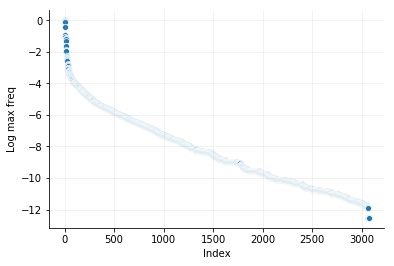

In [7]:
max_fqs['Log max freq'] = np.log(max_fqs['Max frequency'])

sns.scatterplot(
    x = 'Index',
    y = 'Log max freq',
    data = max_fqs,
)
sns.despine()
plt.grid(alpha = 0.2)

In [8]:
for threshold in [0.5, 0.4, 0.3, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]:
    print(threshold, '\t', sum(max_fqs['Max frequency'] >= threshold))

0.5 	 8
0.4 	 8
0.3 	 12
0.2 	 14
0.1 	 21
0.09 	 23
0.08 	 28
0.07 	 30
0.06 	 31
0.05 	 35
0.04 	 42
0.03 	 58
0.02 	 93
0.01 	 202


In [9]:
max_fqs[max_fqs['Max frequency'] >= 0.05]

,Mutation,Max frequency,Index,Log max freq
0,111R,0.995679,0,-0.004330
1,106I,0.984178,1,-0.015949
2,149Y,0.973145,2,-0.027222
3,119N,0.936896,3,-0.065183
4,26G,0.921471,4,-0.081784
5,167G,0.905287,5,-0.099503
6,109S,0.865926,6,-0.143956
7,88A,0.635436,7,-0.453444
8,158T,0.396269,8,-0.925662
9,126L,0.337437,9,-1.086376


## Max frequency by position

In [11]:
max_fqs['Position'] = [int(s[:-1]) for s in max_fqs['Mutation']]

pm_fqs = max_fqs.groupby('Position')['Max frequency'].agg(max).reset_index()
pm_fqs.head()

,Position,Max frequency
0,1,0.301620
1,2,0.008342
2,3,0.007394
3,4,0.007928
4,5,0.012087


Text(0, 0.5, 'Max mutation frequency across samples')

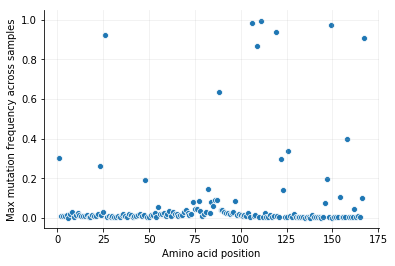

In [12]:
sns.scatterplot(
    x = 'Position',
    y = 'Max frequency',
    data = pm_fqs,
)
sns.despine()
plt.grid(alpha = 0.2)
plt.xlabel('Amino acid position')
plt.ylabel('Max mutation frequency across samples')

## Propose major mutations

In [4]:
pv_df['Max fq'] = pv_df.apply(max, axis = 'columns')

In [5]:
ignore_muts = ['106I']

In [6]:
pv_dfs = pv_df[pv_df['Max fq'] >= 0.05]

# Filter mutations
subset_index = [s for s in pv_dfs.index if s not in ignore_muts]
pv_dfs = pv_dfs.loc[subset_index]

print(pv_dfs.shape)

pv_dfs.to_csv(parent_script.out_dir + f'_above5.csv')

(34, 100)


In [13]:
pv_dfs = pv_df[pv_df['Max fq'] >= 0.10]

# Filter mutations
subset_index = [s for s in pv_dfs.index if s not in ignore_muts]
pv_dfs = pv_dfs.loc[subset_index]

print(pv_dfs.shape)

pv_dfs.to_csv(parent_script.out_dir + f'_above10.csv')

(20, 100)


In [14]:
# Note: Threshold of 10% cuts off 166I and 167N, two consensus mutations that the paper describes. 
# Threshold of 8% is the highest that gets all consensus mutations.

pv_dfs = pv_df[pv_df['Max fq'] >= 0.08]

# Filter mutations
subset_index = [s for s in pv_dfs.index if s not in ignore_muts]
pv_dfs = pv_dfs.loc[subset_index]

print(pv_dfs.shape)

print(pv_dfs.index)

pv_dfs.to_csv(parent_script.out_dir + f'_above8.csv')

(27, 100)
Index(['109S', '109T', '111R', '119N', '122N', '123H', '126L', '147D', '147S',
       '149Y', '154K', '158T', '166I', '167G', '167N', '1I', '23L', '26C',
       '26G', '48S', '74L', '77V', '82T', '86R', '87G', '88A', '97A'],
      dtype='object', name='Mutation')


## plot common single mutation trajectories

In [35]:
import copy
pv_dfs2 = copy.copy(pv_dfs)
pv_dfs2['Mutation'] = pv_dfs2.index

In [36]:
dfs = pv_dfs2[pv_dfs2['Max fq'] > 0.20]
print(dfs.shape)

dfs = dfs.drop(['Max fq'], axis = 'columns')

dfms = dfs.melt(id_vars = 'Mutation', value_name = 'Frequency')
dfms.head()

(14, 101)


,Mutation,Condition,Frequency
0,106I,1,0.981538
1,109S,1,0.000766
2,109T,1,0.001208
3,111R,1,0.015453
4,119N,1,0.000245


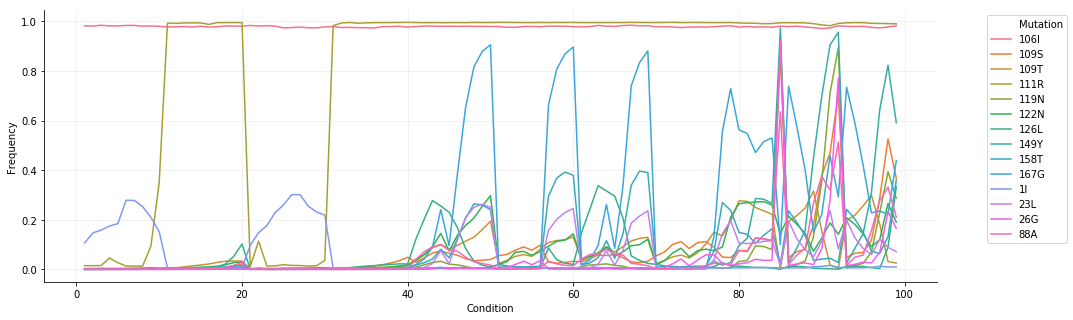

In [31]:
fig, ax = plt.subplots(figsize = (16, 5))

sns.lineplot(
    x = 'Condition',
    y = 'Frequency',
    hue = 'Mutation',
    data = dfms,
    ax = ax,
)
plt.grid(alpha = 0.2)
sns.despine()
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

## write out major muts

In [7]:
pv_df['Max fq'] = pv_df.apply(max, axis = 'columns')
ignore_muts = ['106I']
pv_dfs = pv_df[pv_df['Max fq'] >= 0.05]

# Filter mutations
subset_index = [s for s in pv_dfs.index if s not in ignore_muts]
pv_dfs = pv_dfs.loc[subset_index]

print(pv_dfs.shape)

muts = pv_dfs.index
print(muts)

(34, 100)
Index(['109S', '109T', '111R', '119N', '122N', '123H', '126L', '146G', '147D',
       '147H', '147S', '149Y', '154K', '158T', '166I', '167G', '167N', '1I',
       '23L', '26C', '26G', '48S', '55P', '74G', '74L', '74V', '77V', '82T',
       '84L', '85Q', '86R', '87G', '88A', '97A'],
      dtype='object', name='Mutation')


In [8]:
with open(_config.DATA_DIR + f'tada_aa.fa') as f:
    ref_aa = f.readlines()[1].strip()
    
print(ref_aa)

MSEVEFSHEYWMRHALTLAKRARDEREVPVGAVLVLNNRVIGEGWNRAIGLHDPTAHAEIMALRQGGLVMQNYRLIDATLYVTFEPCVMCAGAMIHSRIGRVVFGIRNAKTGAAGSLMDVLHYPGMNHRVEITEGILADECAALLCYFFRMPRQVFNAQKKAQSSTD


In [10]:
for mut in muts:
    pos = int(mut[:-1])
    mut_aa = mut[-1]
    
    wt_aa = ref_aa[pos - 1]
    print(f'{wt_aa}{mut}')

A109S
A109T
T111R
D119N
H122N
Y123H
M126L
C146G
Y147D
Y147H
Y147S
F149Y
Q154K
A158T
T166I
D167G
D167N
M1I
R23L
R26C
R26G
A48S
T55P
R74G
R74L
R74V
D77V
V82T
F84L
E85Q
P86R
C87G
V88A
S97A
